## Hypothesis
To predict the incentive level requested for raising thermostat settings for 2-3F 
    when being at home in summer.
    
IV: EnergyC, MC, ComfNS, HabitC

### Filter: HomeSYN=1 (i.e., only use people who use A/C when being at home in summer)


In [63]:
options(digits=2);
# Read in the data
survey <- read.csv("DR_Survey2_Share_Complete.csv",header=T);
#populate missing values
survey$IncHomeS[survey$IncHomeS==99] = NA;
survey$IncHomeS[survey$IncHomeS==999] = NA;

#table(survey$HomeS)
survey <- survey[survey$HomeS>60,];
survey <- survey[survey$HomeS<80,];
#table(survey$HomeS)

#table(survey$HomeW)
survey <- survey[survey$HomeW>60,];
survey <- survey[survey$HomeW<80,];
#table(survey$HomeW)

data <- survey[,-c(1:7)];

#We investigate only use people who use A/C when being at home in summer
data1 <- data[data$HomeSYN==1,-which(names(data) %in% c("HomeWYN","AwayWNY","HomeSYN","AwaySNY","City","Utility",
    "ReasonPos","ReasonNeg","NBillS","NBillW","valid1","valid2","valid","Attitude","Trust",
    "MCG", "MCBill","Frugal","ComfortS","ComfortW","SubN","ACYN","HeatYN",
    "Longitude", "Job","hot","cold"))];
sort(names(survey))
#table(survey$Job)
#table(survey$Political)
sort(names(data1))

[1] "ACYN"        "Age"         "Atti"        "Atti1"       "Atti2"      
  [6] "Atti3"       "Atti4"       "Attitude"    "AwayS"       "AwaySNY"    
 [11] "AwayW"       "AwayWNY"     "BillS"       "BillW"       "CashYN"     
 [16] "City"        "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [21] "ComfNW"      "ComfNW1"     "ComfNW2"     "ComfortS"    "ComfortW"   
 [26] "CompR"       "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [31] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "DeviceType" 
 [36] "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"   
 [41] "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal"      "Frugal1"    
 [46] "Frugal2"     "Frugal3"     "Gender"      "HTdevice"    "HTsource"   
 [51] "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"     "HabitC4"    
 [56] "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"     "HabitE2"    
 [61] "HabitE3"     "HabitG"      "HeatYN"      "HomeS"       "HomeSYN"    
 [66] "HomeW"       "HomeWYN"     "HouseholdS"  "ID"          "INT1"       
 [71] "INT2"        "INT3"        "INT4"        "IncAutoS"    "IncAutoW"   
 [76] "IncAwayS"    "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W" 
 [81] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"      
 [86] "Income"      "Job"         "Latitude"    "Longitude"   "MC"         
 [91] "MC1"         "MC2"         "MC3"         "MC4"         "MC5"        
 [96] "MCBill"      "MCG"         "NBillS"      "NBillW"      "OwnRent"    
[101] "PBC"         "PBC1"        "PBC2"        "PBC3R"       "PBC4"       
[106] "PBC5"        "PBillStatus" "Political"   "ReasonNeg"   "ReasonPos"  
[111] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
[116] "SN4"         "Sqft"        "SqftCate"    "State"       "SubN"       
[121] "SubNorm"     "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg" 
[126] "Summer_avgC" "Summer_avgF" "Trust"       "Trust1"      "Trust2"     
[131] "Trust3"      "Trust4"      "Utility"     "Winter_avg"  "Winter_avgC"
[136] "Winter_avgF" "X"           "X.9to5"      "cold"        "hot"        
[141] "valid"       "valid1"      "valid2"

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "AwayS"       "AwayW"       "BillS"       "BillW"      
 [11] "CashYN"      "ComfNS"      "ComfNS1"     "ComfNS2"     "ComfNS3"    
 [16] "ComfNW"      "ComfNW1"     "ComfNW2"     "ControlN1"   "ControlN2R" 
 [21] "ControlN3"   "ControlN4"   "ConvB1"      "ConvB2"      "ConvB3"     
 [26] "ConvB4"      "Educ"        "EmerRForm"   "EnergyC"     "EnergyC1"   
 [31] "EnergyC2"    "EnergyC3"    "EnergyC4"    "Ethnic"      "Frugal1"    
 [36] "Frugal2"     "Frugal3"     "Gender"      "HabitC"      "HabitC1"    
 [41] "HabitC2"     "HabitC3"     "HabitC4"     "HabitC5"     "HabitC6"    
 [46] "HabitC7"     "HabitE1"     "HabitE2"     "HabitE3"     "HabitG"     
 [51] "HomeS"       "HomeW"       "HouseholdS"  "INT1"        "INT2"       
 [56] "INT3"        "INT4"        "IncAutoS"    "IncAutoW"    "IncAwayS"   
 [61] "IncAwayW"    "IncDish"     "IncEmer10S"  "IncEmer10W"  "IncEmer30S" 
 [66] "IncEmer30W"  "IncHomeS"    "IncHomeW"    "IncWD"       "Income"     
 [71] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [76] "MC4"         "MC5"         "OwnRent"     "PBC"         "PBC1"       
 [81] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "Political"  
 [86] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
 [91] "SN4"         "Sqft"        "SqftCate"    "State"       "SubNorm"    
 [96] "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC"
[101] "Summer_avgF" "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[106] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

In [64]:
#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

[1] "X.9to5" "191"   
[1] "HomeW" "191"  
[1] "HomeS" "191"  
[1] "AwayW" "236"  
[1] "AwayS" "257"  
[1] "IncHomeS" "195"     
[1] "IncHomeW" "191"     
[1] "RewardForm" "191"       
[1] "IncAwayS" "191"     
[1] "IncAwayW" "191"     
[1] "IncWD" "231"  
[1] "IncDish" "324"    
[1] "IncAutoS" "191"     
[1] "IncAutoW" "191"     
[1] "IncEmer10S" "191"       
[1] "IncEmer30S" "191"       
[1] "IncEmer10W" "191"       
[1] "IncEmer30W" "191"       
[1] "EmerRForm" "191"      
[1] "EnergyC1" "191"     
[1] "EnergyC2" "191"     
[1] "EnergyC3" "191"     
[1] "EnergyC4" "191"     
[1] "MC1" "191"
[1] "MC2" "191"
[1] "MC3" "191"
[1] "MC4" "191"
[1] "MC5" "191"
[1] "Frugal1" "191"    
[1] "Frugal2" "191"    
[1] "Frugal3" "191"    
[1] "Trust1" "191"   
[1] "Trust2" "191"   
[1] "Trust3" "191"   
[1] "Trust4" "191"   
[1] "ComfNS1" "191"    
[1] "ComfNS2" "191"    
[1] "ComfNS3" "191"    
[1] "ComfNW1" "191"    
[1] "ComfNW2" "191"    
[1] "ConvB1" "191"   
[1] "ConvB2" "191"   
[1] "ConvB3"

In [65]:
#lets remover these
data2 <- data1[,-which(names(data1) %in% c("HomeW","AwayW",
                    "AwayS","IncWD","IncDish"))];
print(dim(data2))
data2 <- na.omit(data2)
print(dim(data2))
#table(data2$Political)

[1] 732 104
[1] 490 104


In [66]:
#names(data2)
#These are only variables we really care about
IVS = c(
"Age",
"Atti",
"Gender",
"OwnRent",
"SqftCate",
"HouseholdS",
"Political",
"Ethnic",
"Income",
"Educ",
"Frugal",
"MC",
"EnergyC",
"Trust",
"ComfNS",
"Atti",
"SubNorm",
"PBC",
"SN",
"HabitG",
"HabitC",
"Latitude",
"HomeS",
"State",
"Summer_avgF",
"CashYN")

In [67]:
sort(names(data2))
paste(sort(IVS))

[1] "Age"         "Atti"        "Atti1"       "Atti2"       "Atti3"      
  [6] "Atti4"       "BillS"       "BillW"       "CashYN"      "ComfNS"     
 [11] "ComfNS1"     "ComfNS2"     "ComfNS3"     "ComfNW"      "ComfNW1"    
 [16] "ComfNW2"     "ControlN1"   "ControlN2R"  "ControlN3"   "ControlN4"  
 [21] "ConvB1"      "ConvB2"      "ConvB3"      "ConvB4"      "Educ"       
 [26] "EmerRForm"   "EnergyC"     "EnergyC1"    "EnergyC2"    "EnergyC3"   
 [31] "EnergyC4"    "Ethnic"      "Frugal1"     "Frugal2"     "Frugal3"    
 [36] "Gender"      "HabitC"      "HabitC1"     "HabitC2"     "HabitC3"    
 [41] "HabitC4"     "HabitC5"     "HabitC6"     "HabitC7"     "HabitE1"    
 [46] "HabitE2"     "HabitE3"     "HabitG"      "HomeS"       "HouseholdS" 
 [51] "INT1"        "INT2"        "INT3"        "INT4"        "IncAutoS"   
 [56] "IncAutoW"    "IncAwayS"    "IncAwayW"    "IncEmer10S"  "IncEmer10W" 
 [61] "IncEmer30S"  "IncEmer30W"  "IncHomeS"    "IncHomeW"    "Income"     
 [66] "Latitude"    "MC"          "MC1"         "MC2"         "MC3"        
 [71] "MC4"         "MC5"         "OwnRent"     "PBC"         "PBC1"       
 [76] "PBC2"        "PBC3R"       "PBC4"        "PBC5"        "Political"  
 [81] "RewardForm"  "SN"          "SN1"         "SN2"         "SN3"        
 [86] "SN4"         "Sqft"        "SqftCate"    "State"       "SubNorm"    
 [91] "SubNorm1"    "SubNorm2"    "SubNorm3"    "Summer_avg"  "Summer_avgC"
 [96] "Summer_avgF" "Trust1"      "Trust2"      "Trust3"      "Trust4"     
[101] "Winter_avg"  "Winter_avgC" "Winter_avgF" "X.9to5"

[1] "Age"         "Atti"        "Atti"        "CashYN"      "ComfNS"     
 [6] "Educ"        "EnergyC"     "Ethnic"      "Frugal"      "Gender"     
[11] "HabitC"      "HabitG"      "HomeS"       "HouseholdS"  "Income"     
[16] "Latitude"    "MC"          "OwnRent"     "PBC"         "Political"  
[21] "SN"          "SqftCate"    "State"       "SubNorm"     "Summer_avgF"
[26] "Trust"

In [68]:
data1 <- data2[, which(names(data2) %in% c("IncHomeS",IVS))];
sort(names(data1))

[1] "Age"         "Atti"        "CashYN"      "ComfNS"      "Educ"       
 [6] "EnergyC"     "Ethnic"      "Gender"      "HabitC"      "HabitG"     
[11] "HomeS"       "HouseholdS"  "IncHomeS"    "Income"      "Latitude"   
[16] "MC"          "OwnRent"     "PBC"         "Political"   "SN"         
[21] "SqftCate"    "State"       "SubNorm"     "Summer_avgF"

In [69]:
#Check to see if there are anymore missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}

In [70]:
#names(data1)

#Fields with lots of missing values
for (n in names(data1)){
    nmis = sum(is.na(data1[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data1[,n]))))
}
    
    
# What about high correlations?
hiCor <- function(x, level){
  res <- cor(x,method="spearman");
  res1 <- res; res1[res<0] <- -res[res < 0];
  for (i in 1:dim(x)[2]){
    res1[i,i] <- 0;
  }
  sel <- apply(res1,1,max,na.rm=T) > level;
  res[sel,sel];
}
#hiCor(data1,.75)

In [71]:
#data1 [is.na(data1$IncHomeS), ]

In [72]:
#summary(data1$IncHomeS)
#table(data1$IncHomeS)
#table(data1$HouseholdS)

In [73]:
data2 <- data1;
data2 <- na.omit(data2)
names(data2)

[1] "HomeS"       "IncHomeS"    "State"       "Age"         "Gender"     
 [6] "OwnRent"     "SqftCate"    "HouseholdS"  "Political"   "Ethnic"     
[11] "Income"      "Educ"        "Latitude"    "EnergyC"     "PBC"        
[16] "CashYN"      "MC"          "ComfNS"      "Atti"        "SubNorm"    
[21] "SN"          "HabitG"      "HabitC"      "Summer_avgF"

In [74]:
#Check to see if there are anymore missing values
for (n in names(data2)){
    nmis = sum(is.na(data2[,n]))
    if(nmis >1)  print (c(n, sum(is.na(data2[,n]))))
}

In [75]:
#convert all data to numeric values

sapply(data2,sd)

HomeS    IncHomeS       State         Age      Gender     OwnRent 
       3.82        1.76       17.04       11.23        0.50        0.51 
   SqftCate  HouseholdS   Political      Ethnic      Income        Educ 
       1.13        1.21        0.85        0.35        1.98        1.12 
   Latitude     EnergyC         PBC      CashYN          MC      ComfNS 
       5.09        1.39        0.93        0.28        1.08        1.41 
       Atti     SubNorm          SN      HabitG      HabitC Summer_avgF 
       1.08        1.34        1.40        1.16        1.38        5.26

In [76]:
hiCor(data2,.7)

,Latitude,Summer_avgF
Latitude,1.00,-0.83
Summer_avgF,-0.83,1.00


In [77]:
#plot(data2$SN,data2$SubNorm,pch=".",scatter=)

In [79]:
res<-prcomp(data2, retx=F,scale=T)$rotation[,1:20];
resAbs <- res;
resAbs[res<0] <- -res[res<0];
z <- cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2)

for (i in 1:20){
  print(z[i]);
  print(t(res[resAbs[,i]>.2,i,drop=FALSE]));
}


[1] 0.13
    EnergyC   PBC    MC  Atti SubNorm   SN HabitG HabitC
PC1   -0.38 -0.23 -0.34 -0.42   -0.35 -0.2  -0.29  -0.25
[1] 0.23
    HomeS  Age OwnRent SqftCate HouseholdS Income
PC2  0.29 0.34    0.47     0.49       0.23   0.37
[1] 0.31
    Latitude ComfNS Summer_avgF
PC3     0.56  -0.24       -0.57
[1] 0.37
    HomeS Gender HouseholdS Educ    SN HabitC
PC4  0.25  -0.33      -0.58 0.48 -0.23   0.23
[1] 0.43
    State Political Ethnic Income Educ   PBC ComfNS HabitG
PC5 -0.23      0.46   -0.4   0.22 0.24 -0.32  -0.32  -0.32
[1] 0.49
    HomeS IncHomeS   Age Political CashYN ComfNS HabitC
PC6  0.22     -0.5 -0.36     -0.27  -0.33  -0.38   0.25
[1] 0.53
    HomeS Gender Income  PBC CashYN   MC HabitC
PC7 -0.23  -0.38   0.32 0.28   0.56 0.26  -0.22
[1] 0.58
    State  Age Gender ComfNS SubNorm    SN
PC8  0.35 0.27   0.28  -0.36   -0.27 -0.55
[1] 0.62
    HomeS IncHomeS State Gender Ethnic   SN HabitG
PC9 -0.23     0.44  0.51  -0.24  -0.42 0.25   0.26
[1] 0.66
     State Gender Ethnic E

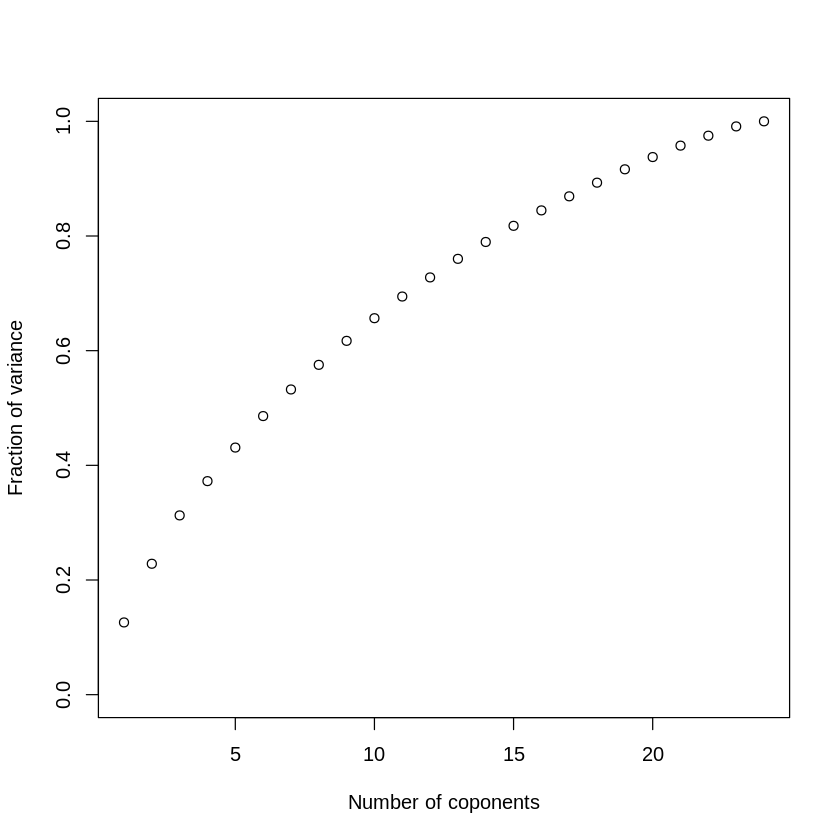

In [80]:
plot(1:dim(data2)[2],cumsum(prcomp(data2, retx=F,scale=T)$sdev^2)/
     sum(prcomp(data2, retx=F,scale=T)$sdev^2),
     ylim=c(0,1),xlab="Number of coponents",
     ylab="Fraction of variance");

In [81]:
res <- c();
vnam <- names(data2);
for (i in 2:dim(data2)[2]){
  fmla <- as.formula(paste(vnam[i],paste(vnam[-c(1,i)],collapse="+"),sep="~"));
  res <- rbind(res,c(i,round(summary(lm(fmla,data=data2))$r.squared,2)));
}

In [82]:
row.names(res) <- vnam[res[,1]];
o = order(-res[,2]);
res[o,][res[o,2]<.7,]

Summer_avgF,24,0.62
Latitude,13,0.61
Atti,19,0.45
SqftCate,7,0.42
EnergyC,14,0.39
OwnRent,6,0.36
Income,11,0.29
SubNorm,20,0.27
HouseholdS,8,0.26
MC,17,0.25
Age,4,0.24


In [83]:
fit <- factanal(data2, 2, rotation="varimax")
print(fit, digits=2, cutoff=.3, sort=TRUE)


Call:
factanal(x = data2, factors = 2, rotation = "varimax")

Uniquenesses:
      HomeS    IncHomeS       State         Age      Gender     OwnRent 
       0.90        0.97        0.97        1.00        0.92        0.99 
   SqftCate  HouseholdS   Political      Ethnic      Income        Educ 
       0.99        0.99        0.94        0.96        0.99        0.98 
   Latitude     EnergyC         PBC      CashYN          MC      ComfNS 
       0.38        0.55        0.90        0.99        0.75        0.94 
       Atti     SubNorm          SN      HabitG      HabitC Summer_avgF 
       0.43        0.73        0.92        0.84        0.89        0.05 

Loadings:
            Factor1 Factor2
EnergyC      0.65          
Atti         0.72          
Latitude            -0.77  
Summer_avgF          0.95  
HomeS                0.32  
IncHomeS                   
State                      
Age                        
Gender                     
OwnRent                    
SqftCate            

In [84]:
IndepPred <- row.names(res[o,][res[o,2]<.7,])

In [85]:
#Gender, OwnRent, SqftCate, HouseholdS, Political, Ethnic, Income, Educ
#   Latitude, HomeS, EnergyC, MC, ComfNS, HabitC, Summer_avgF

In [112]:
#IndepPred = c('Age', 'Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'MC', 'ComfNS', 'HabitC', 'Atti', 'SubNorm', 'PBC', 'Summer_avgF')
IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'HouseholdS', 'EnergyC', 'MC', 'ComfNS', 'HabitC')
fmla <- as.formula(paste("IncHomeS",paste(IndepPred,collapse="+"),sep="~"));

In [113]:
table(data2[,"IncHomeS"])
data2$StateCA=data2$State==5
table(data2$StateCA)


  1   2   3   4   5   6   7   8 
 38  30  94 176  44  45  36  27 


FALSE  TRUE 
  469    21 

In [114]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.929 -1.048 -0.164  0.984  4.349 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.78752    0.70634    3.95  9.1e-05 ***
Age          0.02139    0.00752    2.85   0.0046 ** 
Income      -0.01460    0.04458   -0.33   0.7434    
Educ         0.02280    0.07356    0.31   0.7568    
OwnRent      0.20361    0.18173    1.12   0.2631    
SqftCate     0.02179    0.08707    0.25   0.8025    
HouseholdS  -0.08794    0.07053   -1.25   0.2131    
EnergyC     -0.07694    0.05755   -1.34   0.1819    
MC          -0.05279    0.07356   -0.72   0.4733    
ComfNS       0.30618    0.05545    5.52  5.5e-08 ***
HabitC      -0.08772    0.05752   -1.53   0.1279    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 479 degrees of freedom
Multiple R-squared:  0.117,	Adjusted R-squared:  0.0981 
F-statistic: 6.32 on 10 and 479 DF,  p-value:

In [115]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,5.3e+01,52.922,18.848,1.7e-05
Income,1,8.0e-02,0.080,0.028,8.7e-01
Educ,1,1.8e+00,1.844,0.657,4.2e-01
OwnRent,1,1.5e+00,1.454,0.518,4.7e-01
SqftCate,1,1.7e-02,0.017,0.006,9.4e-01
HouseholdS,1,2.3e+00,2.321,0.827,3.6e-01
EnergyC,1,1.7e+01,16.976,6.046,1.4e-02
MC,1,2.9e+00,2.917,1.039,3.1e-01
ComfNS,1,9.2e+01,92.292,32.870,1.7e-08
HabitC,1,6.5e+00,6.531,2.326,1.3e-01


In [116]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>72)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    72)

Residuals:
   Min     1Q Median     3Q    Max 
-4.329 -1.058 -0.191  0.914  4.532 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.44113    0.83417    4.13  4.7e-05 ***
Age          0.02234    0.00926    2.41    0.016 *  
Income       0.02647    0.05205    0.51    0.611    
Educ        -0.01849    0.08857   -0.21    0.835    
OwnRent      0.01158    0.21366    0.05    0.957    
SqftCate     0.03307    0.10563    0.31    0.754    
HouseholdS  -0.18186    0.08235   -2.21    0.028 *  
EnergyC     -0.11026    0.06769   -1.63    0.104    
MC          -0.07057    0.08784   -0.80    0.422    
ComfNS       0.33277    0.06840    4.87  1.8e-06 ***
HabitC      -0.10789    0.06947   -1.55    0.121    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 335 degrees of freedom
Multiple R-squared:  0.141,	Adjusted R-squared:  0.115 
F-statis

In [117]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,39.662,39.662,13.991,2.2e-04
Income,1,0.034,0.034,0.012,9.1e-01
Educ,1,3.534,3.534,1.247,2.6e-01
OwnRent,1,0.868,0.868,0.306,5.8e-01
SqftCate,1,0.215,0.215,0.076,7.8e-01
HouseholdS,1,7.841,7.841,2.766,9.7e-02
EnergyC,1,21.001,21.001,7.408,6.8e-03
MC,1,4.770,4.770,1.683,2.0e-01
ComfNS,1,70.946,70.946,25.026,9.1e-07
HabitC,1,6.838,6.838,2.412,1.2e-01


In [135]:
#added CashYN to model
#IndepPred = c('Gender', 'OwnRent', 'SqftCate', 'HouseholdS', 'Political', 'Ethnic', 'Income', 'Educ', 'Latitude', 'MC', 'ComfNS', 'HabitC', 'Summer_avgF', 'CashYN')
IndepPred = c('Age', 'Income', 'Educ', 'OwnRent', 'SqftCate', 'HouseholdS', 'EnergyC', 'MC', 'ComfNS', 'HabitC', 'CashYN')
fmla <- as.formula(paste("IncHomeS",paste(IndepPred,collapse="+"),sep="~"));

In [136]:
mod = lm(fmla,data=data2)
summary(mod)


Call:
lm(formula = fmla, data = data2)

Residuals:
   Min     1Q Median     3Q    Max 
-3.946 -1.055 -0.195  0.967  4.341 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  2.50448    0.73638    3.40  0.00073 ***
Age          0.02088    0.00752    2.78  0.00569 ** 
Income      -0.01763    0.04460   -0.40  0.69274    
Educ         0.02007    0.07352    0.27  0.78498    
OwnRent      0.21845    0.18191    1.20  0.23039    
SqftCate     0.02720    0.08709    0.31  0.75493    
HouseholdS  -0.08681    0.07048   -1.23  0.21865    
EnergyC     -0.07906    0.05753   -1.37  0.17001    
MC          -0.06299    0.07388   -0.85  0.39437    
ComfNS       0.30360    0.05544    5.48    7e-08 ***
HabitC      -0.08145    0.05766   -1.41  0.15842    
CashYNTRUE   0.36955    0.27446    1.35  0.17880    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 478 degrees of freedom
Multiple R-squared:  0.12,	Adjusted R-squared:  0

In [127]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,5.3e+01,52.9223,1.9e+01,1.6e-05
OwnRent,1,1.6e+00,1.6149,5.8e-01,4.5e-01
SqftCate,1,2.7e-03,0.0027,9.5e-04,9.8e-01
HouseholdS,1,1.6e+00,1.5914,5.7e-01,4.5e-01
EnergyC,1,1.8e+01,18.3732,6.6e+00,1.1e-02
MC,1,3.1e+00,3.0625,1.1e+00,3.0e-01
ComfNS,1,9.3e+01,93.0092,3.3e+01,1.4e-08
HabitC,1,6.3e+00,6.3275,2.3e+00,1.3e-01
CashYN,1,5.0e+00,5.0089,1.8e+00,1.8e-01
Residuals,480,1.3e+03,2.7924,NA,NA


In [128]:
mod = lm(fmla,data=data2,subs=data2$Latitude<37)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Latitude < 37)

Residuals:
   Min     1Q Median     3Q    Max 
-3.589 -1.071 -0.174  0.967  3.975 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.7753     1.0454    3.61  0.00038 ***
Age           0.0302     0.0112    2.71  0.00736 ** 
OwnRent      -0.1721     0.2506   -0.69  0.49317    
SqftCate      0.0722     0.1250    0.58  0.56382    
HouseholdS   -0.1422     0.0968   -1.47  0.14325    
EnergyC      -0.2052     0.0859   -2.39  0.01785 *  
MC           -0.1262     0.1173   -1.08  0.28307    
ComfNS        0.3833     0.0805    4.76  3.6e-06 ***
HabitC       -0.0825     0.0823   -1.00  0.31774    
CashYNTRUE    0.1284     0.4737    0.27  0.78655    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.6 on 204 degrees of freedom
Multiple R-squared:  0.216,	Adjusted R-squared:  0.181 
F-statistic: 6.24 on 9 and 204 DF,  p-value: 9e-08


In [129]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,37.39,37.39,14.388,2.0e-04
OwnRent,1,0.28,0.28,0.106,7.4e-01
SqftCate,1,1.37,1.37,0.526,4.7e-01
HouseholdS,1,4.31,4.31,1.660,2.0e-01
EnergyC,1,34.17,34.17,13.147,3.6e-04
MC,1,5.44,5.44,2.094,1.5e-01
ComfNS,1,60.08,60.08,23.115,3.0e-06
HabitC,1,2.66,2.66,1.023,3.1e-01
CashYN,1,0.19,0.19,0.074,7.9e-01
Residuals,204,530.21,2.60,NA,NA


In [130]:
mod = lm(fmla,data=data2,subs=data2$Summer_avgF>72)
summary(mod)


Call:
lm(formula = fmla, data = data2, subset = data2$Summer_avgF > 
    72)

Residuals:
   Min     1Q Median     3Q    Max 
-4.332 -1.046 -0.166  0.955  4.483 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   3.2328     0.8309    3.89  0.00012 ***
Age           0.0225     0.0092    2.44  0.01506 *  
OwnRent       0.0278     0.2112    0.13  0.89518    
SqftCate      0.0500     0.1025    0.49  0.62575    
HouseholdS   -0.1775     0.0817   -2.17  0.03058 *  
EnergyC      -0.1121     0.0673   -1.67  0.09657 .  
MC           -0.0867     0.0889   -0.98  0.32996    
ComfNS        0.3328     0.0677    4.91  1.4e-06 ***
HabitC       -0.1026     0.0693   -1.48  0.13942    
CashYNTRUE    0.2962     0.3383    0.88  0.38200    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.7 on 336 degrees of freedom
Multiple R-squared:  0.142,	Adjusted R-squared:  0.119 
F-statistic: 6.19 on 9 and 336 DF,  p-value: 4.43e-08


In [124]:
anova(mod)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Age,1,39.662,39.662,13.979,2.2e-04
Income,1,0.034,0.034,0.012,9.1e-01
Educ,1,3.534,3.534,1.246,2.7e-01
OwnRent,1,0.868,0.868,0.306,5.8e-01
SqftCate,1,0.215,0.215,0.076,7.8e-01
HouseholdS,1,7.841,7.841,2.764,9.7e-02
EnergyC,1,21.001,21.001,7.402,6.9e-03
MC,1,4.770,4.770,1.681,2.0e-01
ComfNS,1,70.946,70.946,25.005,9.3e-07
HabitC,1,6.838,6.838,2.410,1.2e-01
